# IMPORT IMPORTANT LIBRARIES AND DATASETS

In [99]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score


In [3]:
#Import data
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
gender_submission = pd.read_csv("gender_submission.csv")

In [4]:
#prints the first 5 rows of the data
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# return the data types of each feature
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
#Store the number of survivors in survived data frame
survived_df = train_data[  train_data['Survived'] == 1]

#Store the number of non survivors in not_survived data frame
not_survived = train_data[  train_data['Survived'] == 0]


In [7]:
# Total number of passengers
len(train_data)

891

In [8]:
#Number of passengers who survived
len(survived_df)

342

In [9]:
#Number of passengers who died
len(train_data) - len(survived_df)

549

# Data Visualizatiom

0    549
1    342
Name: Survived, dtype: int64


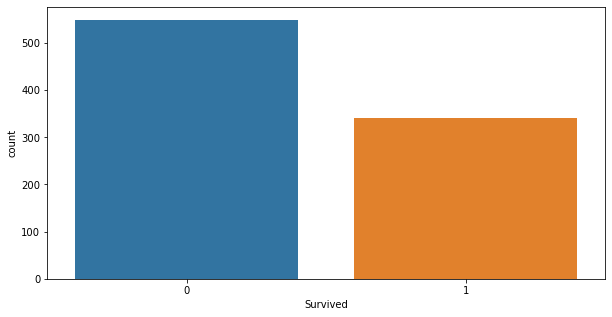

In [10]:
fig = plt.figure(figsize = (10,5))
sns.countplot(x='Survived', data = train_data)
print(train_data.Survived.value_counts())

<AxesSubplot:xlabel='Pclass', ylabel='count'>

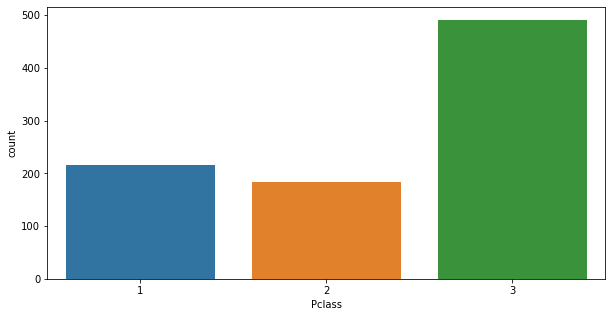

In [11]:
# How many people survived based on the class?
fig = plt.figure(figsize = (10,5))
sns.countplot(x='Pclass', data = train_data)
#print(train_data.Survived.value_counts())

<AxesSubplot:xlabel='Pclass', ylabel='count'>

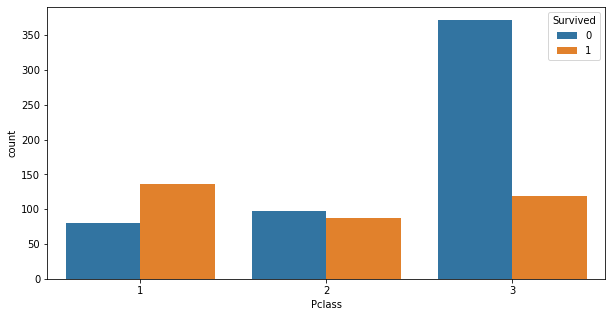

In [12]:
#How many people survived from each class?
fig = plt.figure(figsize = (10,5))
sns.countplot(x='Pclass', hue = 'Survived', data = train_data)


<AxesSubplot:xlabel='Pclass', ylabel='count'>

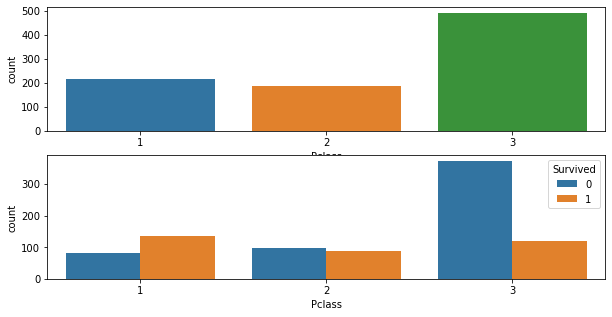

In [49]:
#plot both graphs as one figure
#plt.figure(figsize = (10,5))
#plt.subplot(211)
#sns.countplot(x='Pclass', data = train_data)

#plt.subplot(212)
#sns.countplot(x='Pclass', hue = 'Survived', data = train_data)


<AxesSubplot:xlabel='SibSp', ylabel='count'>

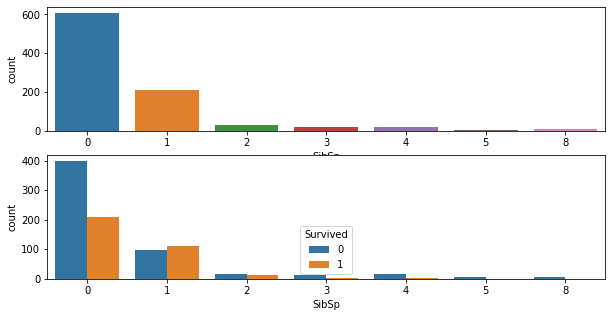

In [13]:
# How many people survived based on the number of siblings?
plt.figure(figsize = (10,5))
plt.subplot(211)
sns.countplot(x='SibSp', data = train_data)

plt.subplot(212)
sns.countplot(x='SibSp', hue = 'Survived', data = train_data)

<AxesSubplot:xlabel='Sex', ylabel='count'>

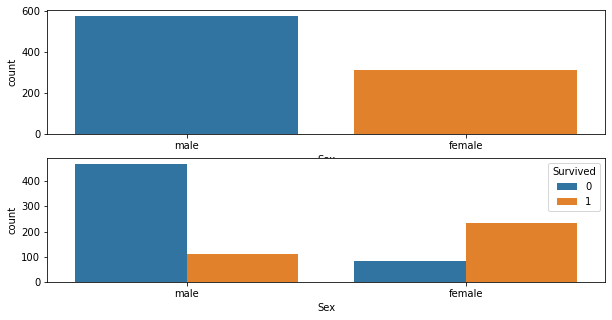

In [14]:
# How many people survived based on gender?
plt.figure(figsize = (10,5))
plt.subplot(211)
sns.countplot(x='Sex', data = train_data)

plt.subplot(212)
sns.countplot(x='Sex', hue = 'Survived', data = train_data)

<AxesSubplot:xlabel='Parch', ylabel='count'>

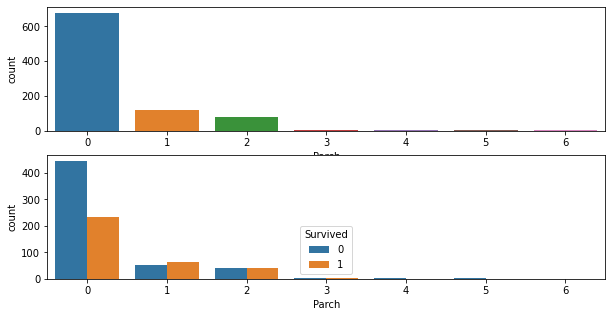

In [15]:
# How many people survived based on the Parch number?
plt.figure(figsize = (10,5))
plt.subplot(211)
sns.countplot(x='Parch', data = train_data)

plt.subplot(212)
sns.countplot(x='Parch', hue = 'Survived', data = train_data)

<AxesSubplot:>

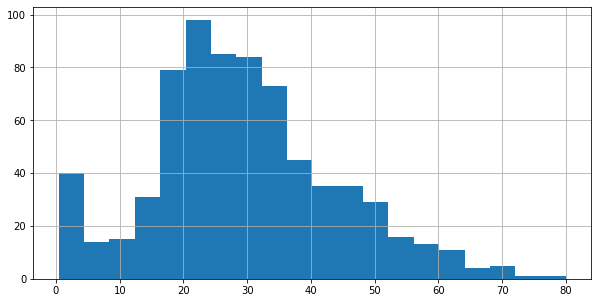

In [16]:
# Age distribution Histogram
plt.figure(figsize = (10,5))
train_data['Age'].hist(bins = 20)

<AxesSubplot:>

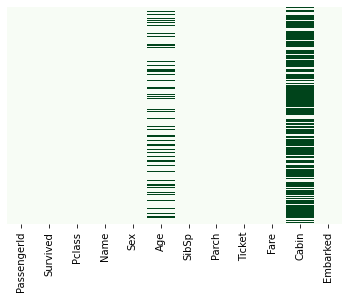

In [17]:
# Which other features have missing data?
sns.heatmap(train_data.isnull(), yticklabels = False, cbar = False, cmap = "Greens")

In [18]:
test_data.Fare.value_counts()

7.7500     21
26.0000    19
13.0000    17
8.0500     17
7.8958     11
           ..
7.8208      1
8.5167      1
78.8500     1
52.0000     1
22.3583     1
Name: Fare, Length: 169, dtype: int64

In [20]:
# Drop the Cabin data since there's a lot of missing data, drop also the name,
# ticket, embarked features as the chances of survival is not dependent
# on these featuers
train_data.drop(['Name', 'Ticket', 'Embarked', 'Cabin'], axis = 1, inplace = True)


In [21]:
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000
887,888,1,1,female,19.0,0,0,30.0000
888,889,0,3,female,NaN,1,2,23.4500
889,890,1,1,male,26.0,0,0,30.0000


<AxesSubplot:xlabel='Sex', ylabel='Age'>

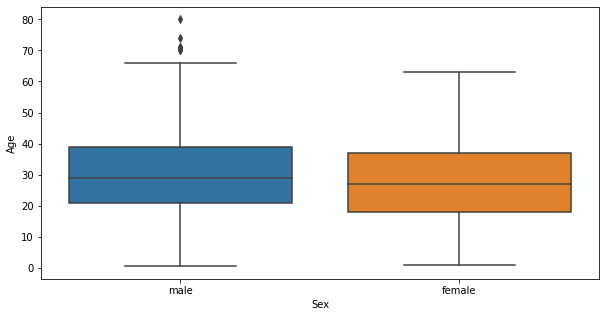

In [22]:
plt.figure(figsize = (10,5))
sns.boxplot(x= 'Sex', y= 'Age', data = train_data)

In [23]:
# dropping umwanted columns
train=train_data.drop(['PassengerId'], axis=1)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [24]:
dummy = pd.get_dummies(train_data['Sex'])

In [25]:
dummy.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [26]:
train2 = pd.concat((train_data,dummy), axis=1)

In [27]:
train2.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,female,male
0,1,0,3,male,22.0,1,0,7.2500,0,1
1,2,1,1,female,38.0,1,0,71.2833,1,0
2,3,1,3,female,26.0,0,0,7.9250,1,0
3,4,1,1,female,35.0,1,0,53.1000,1,0
4,5,0,3,male,35.0,0,0,8.0500,0,1


In [28]:
train2 = train2.drop(['Sex'], axis = 1)

In [29]:
train2.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male
0,1,0,3,22.0,1,0,7.2500,0,1
1,2,1,1,38.0,1,0,71.2833,1,0
2,3,1,3,26.0,0,0,7.9250,1,0
3,4,1,1,35.0,1,0,53.1000,1,0
4,5,0,3,35.0,0,0,8.0500,0,1


In [30]:
train2 = train2.drop(['male'], axis = 1)

In [31]:
train2.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female
0,1,0,3,22.0,1,0,7.2500,0
1,2,1,1,38.0,1,0,71.2833,1
2,3,1,3,26.0,0,0,7.9250,1
3,4,1,1,35.0,1,0,53.1000,1
4,5,0,3,35.0,0,0,8.0500,0


In [32]:
train2.rename(columns={"female":"Sex"})

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex
0,1,0,3,22.0,1,0,7.2500,0
1,2,1,1,38.0,1,0,71.2833,1
2,3,1,3,26.0,0,0,7.9250,1
3,4,1,1,35.0,1,0,53.1000,1
4,5,0,3,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,0
887,888,1,1,19.0,0,0,30.0000,1
888,889,0,3,NaN,1,2,23.4500,1
889,890,1,1,26.0,0,0,30.0000,0


In [33]:
train2 = train2.drop(['PassengerId'], axis = 1)

In [34]:
train2.shape

(891, 7)

In [35]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   female    891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(1)
memory usage: 42.8 KB


In [36]:
womenMedian=train2[train2['female']==1]['Age'].median()
menMedian=train2[train2['female']==0]['Age'].median()

In [37]:
train2.loc[(train2.Age.isnull()) & (train2['female']==0),'Age']=womenMedian
train2.loc[(train2.Age.isnull()) & (train2['female']==1),'Age']=menMedian

In [38]:
train2.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
female      0
dtype: int64

In [39]:
train2

,Survived,Pclass,Age,SibSp,Parch,Fare,female
0,0,3,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,1,3,26.0,0,0,7.9250,1
3,1,1,35.0,1,0,53.1000,1
4,0,3,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0
887,1,1,19.0,0,0,30.0000,1
888,0,3,29.0,1,2,23.4500,1
889,1,1,26.0,0,0,30.0000,0


In [40]:
train2.rename(columns={"female":"Sex"})

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex
0,0,3,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,1,3,26.0,0,0,7.9250,1
3,1,1,35.0,1,0,53.1000,1
4,0,3,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0
887,1,1,19.0,0,0,30.0000,1
888,0,3,29.0,1,2,23.4500,1
889,1,1,26.0,0,0,30.0000,0


In [41]:
# Split the dataframe into data and labels
X_train = train2.drop('Survived', axis=1) 
y_train = train2.Survived 

In [42]:
X_train.shape

(891, 6)

In [43]:
y_train.shape

(891,)

In [44]:
#Fitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_train, 
    y_train,  
    random_state=10,
    stratify=train2.Survived  
)

In [91]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [92]:
y_prediction =classifier.predict(X_train)
y_prediction

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,

In [100]:
#Cross Validation 
cross_val_score(classifier, X_train, y_train, cv=5)

array([0.81343284, 0.7761194 , 0.78358209, 0.78195489, 0.77443609])

In [101]:
cross_val_score(classifier, X_train, y_train, cv=5).mean()

0.7859050611603636

# Logistic Regression hyperameter tuning

In [102]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [103]:
from sklearn.model_selection import GridSearchCV

In [104]:
clf = GridSearchCV(classifier, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [105]:
best_clf = clf.fit(X_train,y_train)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


C:\Users\Isaiah\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.61676699 ...        nan 0.80392949 0.79491375]
  warnings.warn(


In [107]:
best_clf.best_estimator_

LogisticRegression(C=1.623776739188721, max_iter=5000, random_state=0,
                   solver='sag')

In [112]:
print (f'Accuracy - : {best_clf.score(X_train,y_train):.3f}')

Accuracy - : 0.798


<AxesSubplot:>

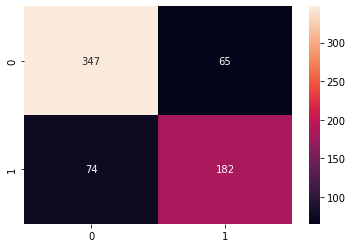

In [110]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train, y_prediction)
sns.heatmap(cm, annot = True, fmt = "d")

In [111]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_prediction))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       412
           1       0.74      0.71      0.72       256

    accuracy                           0.79       668
   macro avg       0.78      0.78      0.78       668
weighted avg       0.79      0.79      0.79       668



In [49]:
# Decision Tree Classifier
DecisionTreeClassifierModel =DecisionTreeClassifier()
DecisionTreeClassifierModel.fit(X_train, y_train)
DecisionTreeClassifierModel.score(X_train,y_train)

0.9805389221556886

In [57]:
y_predict_train =DecisionTreeClassifierModel.predict(X_train)
y_predict_train

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,

<AxesSubplot:>

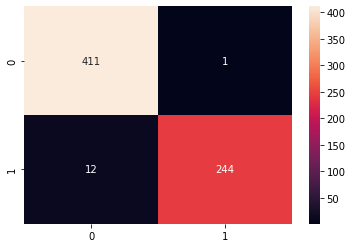

In [58]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train, y_predict_train )
sns.heatmap(cm, annot = True, fmt = "d")

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_predict_train))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       412
           1       1.00      0.95      0.97       256

    accuracy                           0.98       668
   macro avg       0.98      0.98      0.98       668
weighted avg       0.98      0.98      0.98       668



In [54]:
# Gradient Boosting Model
gradientBoostingModel = GradientBoostingClassifier(random_state = 42)
gradientBoostingModel.fit(X_train, y_train)
gradientBoostingModel.score(X_train,y_train)

0.8982035928143712

In [60]:
y_predict_train2 =gradientBoostingModel.predict(X_train)
y_predict_train2

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,

<AxesSubplot:>

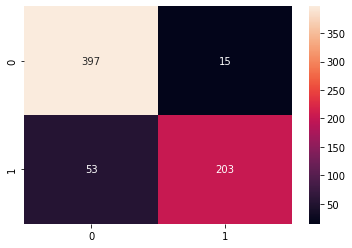

In [61]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train, y_predict_train2)
sns.heatmap(cm, annot = True, fmt = "d")

In [87]:
from sklearn.metrics import classification_report
print(classification_report(y_train, prediction))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       549
           1       0.90      0.80      0.84       342

    accuracy                           0.89       891
   macro avg       0.89      0.87      0.88       891
weighted avg       0.89      0.89      0.89       891



<bound method BaseEstimator.get_params of GradientBoostingClassifier(random_state=42)>

In [64]:
DecisionTreeClassifierModel.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier()>

In [66]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [67]:
# dropping umwanted columns
test1=test_data.drop(['Name','Ticket','Cabin','PassengerId','Embarked'], axis=1)
test1.head(
)

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,34.5,0,0,7.8292
1,3,female,47.0,1,0,7.0000
2,2,male,62.0,0,0,9.6875
3,3,male,27.0,0,0,8.6625
4,3,female,22.0,1,1,12.2875


In [68]:
dummies = pd.get_dummies(test1['Sex'])

In [69]:
dummies.head()

,female,male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0


In [70]:
test2 = pd.concat((test1,dummies), axis=1)

In [71]:
test2 = test2.drop(['Sex'], axis = 1)

In [72]:
test2.head()

,Pclass,Age,SibSp,Parch,Fare,female,male
0,3,34.5,0,0,7.8292,0,1
1,3,47.0,1,0,7.0000,1,0
2,2,62.0,0,0,9.6875,0,1
3,3,27.0,0,0,8.6625,0,1
4,3,22.0,1,1,12.2875,1,0


In [73]:
test2 = test2.drop(['male'], axis = 1)

In [74]:
test2.head()

,Pclass,Age,SibSp,Parch,Fare,female
0,3,34.5,0,0,7.8292,0
1,3,47.0,1,0,7.0000,1
2,2,62.0,0,0,9.6875,0
3,3,27.0,0,0,8.6625,0
4,3,22.0,1,1,12.2875,1


In [75]:
test2.rename(columns={"female":"Sex"})

,Pclass,Age,SibSp,Parch,Fare,Sex
0,3,34.5,0,0,7.8292,0
1,3,47.0,1,0,7.0000,1
2,2,62.0,0,0,9.6875,0
3,3,27.0,0,0,8.6625,0
4,3,22.0,1,1,12.2875,1
...,...,...,...,...,...,...
413,3,NaN,0,0,8.0500,0
414,1,39.0,0,0,108.9000,1
415,3,38.5,0,0,7.2500,0
416,3,NaN,0,0,8.0500,0


In [76]:
test2.shape

(418, 6)

In [77]:
test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Age     332 non-null    float64
 2   SibSp   418 non-null    int64  
 3   Parch   418 non-null    int64  
 4   Fare    417 non-null    float64
 5   female  418 non-null    uint8  
dtypes: float64(2), int64(3), uint8(1)
memory usage: 16.9 KB


In [78]:
womenMedian=test2[test2['female']==1]['Age'].median()
menMedian=test2[test2['female']==0]['Age'].median()

In [79]:
test2.loc[(test2.Age.isnull()) & (test2['female']==1),'Age']=womenMedian
test2.loc[(test2.Age.isnull()) & (test2['female']==0),'Age']=menMedian

In [80]:
test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Age     418 non-null    float64
 2   SibSp   418 non-null    int64  
 3   Parch   418 non-null    int64  
 4   Fare    417 non-null    float64
 5   female  418 non-null    uint8  
dtypes: float64(2), int64(3), uint8(1)
memory usage: 16.9 KB


In [81]:
test2['Fare']=test2['Fare'].fillna(test2['Fare'].median())

In [82]:
test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Age     418 non-null    float64
 2   SibSp   418 non-null    int64  
 3   Parch   418 non-null    int64  
 4   Fare    418 non-null    float64
 5   female  418 non-null    uint8  
dtypes: float64(2), int64(3), uint8(1)
memory usage: 16.9 KB


In [83]:
test2.head()

,Pclass,Age,SibSp,Parch,Fare,female
0,3,34.5,0,0,7.8292,0
1,3,47.0,1,0,7.0000,1
2,2,62.0,0,0,9.6875,0
3,3,27.0,0,0,8.6625,0
4,3,22.0,1,1,12.2875,1


In [84]:
test2.rename(columns={"female":"Sex"})

,Pclass,Age,SibSp,Parch,Fare,Sex
0,3,34.5,0,0,7.8292,0
1,3,47.0,1,0,7.0000,1
2,2,62.0,0,0,9.6875,0
3,3,27.0,0,0,8.6625,0
4,3,22.0,1,1,12.2875,1
...,...,...,...,...,...,...
413,3,27.0,0,0,8.0500,0
414,1,39.0,0,0,108.9000,1
415,3,38.5,0,0,7.2500,0
416,3,27.0,0,0,8.0500,0


In [116]:
prediction3 = classifier.predict(test2)
prediction3

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [117]:
ubmission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": prediction3
    })
submission.to_csv('gender_submission.csv', index=False)

In [85]:
prediction = gradientBoostingModel.predict(test2)

In [86]:
prediction 

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [87]:
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": prediction
    })
submission.to_csv('gender_submission.csv', index=False)

In [88]:
pred_df = pd.read_csv('gender_submission.csv')

In [89]:
prediction2 = DecisionTreeClassifierModel.predict(test2)
prediction2

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [90]:
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": prediction2
    })
submission.to_csv('gender_submission.csv', index=False)